In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np

In [2]:
df = pd.read_csv('CreditScoring.csv')

In [3]:
df.shape

(4455, 14)

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [7]:
status_values = {
    0: 'unknown', 1: 'ok', 2: 'default'
}

In [8]:
df['status'] = df.status.map(status_values)

In [9]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [11]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,763316.99,1060340.81,404381.96,1039.02,1462.88
std,8.17,14.66,10.98,19.52,8703625.26,10217568.67,6344253.40,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3500.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,166.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,99999999.00,99999999.00,99999999.00,5000.00,11140.00


In [12]:
for cols in ['income','assets','debt']:
    df[cols] = df[cols].replace(99999999, np.nan)

In [13]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.00,4455.00,4455.00,4455.00,4421.00,4408.00,4437.00,4455.00,4455.00
mean,7.99,46.44,37.08,55.57,130.57,5403.43,342.95,1039.02,1462.88
std,8.17,14.66,10.98,19.52,86.37,11573.16,1245.86,474.54,628.09
min,0.00,6.00,18.00,35.00,0.00,0.00,0.00,100.00,105.00
25%,2.00,36.00,28.00,35.00,80.00,0.00,0.00,700.00,1117.50
50%,5.00,48.00,36.00,51.00,120.00,3000.00,0.00,1000.00,1400.00
75%,12.00,60.00,45.00,72.00,165.00,6000.00,0.00,1300.00,1692.00
max,48.00,72.00,68.00,180.00,959.00,300000.00,30000.00,5000.00,11140.00


In [14]:
df = df[df.status != 'unknown'].reset_index(drop=True)

In [15]:
df.shape

(4454, 14)

In [16]:
df['status'] = (df.status == 'default').astype(int)

In [17]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,9,rent,60,30,married,no,freelance,73,129.00,0.00,0.00,800,846
1,0,17,rent,60,58,widow,no,fixed,48,131.00,0.00,0.00,1000,1658
2,1,10,owner,36,46,married,yes,freelance,90,200.00,3000.00,0.00,2000,2985
3,0,0,rent,60,24,single,no,fixed,63,182.00,2500.00,0.00,900,1325
4,0,0,rent,36,26,single,no,fixed,46,107.00,0.00,0.00,310,910


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=7)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=7)

In [20]:
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

((3563, 14), (2672, 14), (891, 14), (891, 14))

In [21]:
df_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1446,0,3,parents,60,25,single,no,fixed,35,130.00,6000.00,0.00,625,1083
350,0,30,rent,60,52,married,no,freelance,70,100.00,14500.00,0.00,1250,1563
2206,0,4,parents,60,28,divorced,no,fixed,35,185.00,0.00,0.00,1500,1797
2239,0,17,owner,36,38,married,no,freelance,75,0.00,19000.00,800.00,700,795
671,1,15,owner,36,49,married,no,freelance,75,70.00,3572.00,1728.00,1650,2755


In [22]:
 df_train = df_train.reset_index(drop=True)
 df_val = df_val.reset_index(drop=True)
 df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.status.values
y_val = df_val.status.values
y_test = df_test.status.values

In [24]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
del df_train['status']
del df_val['status']
del df_test['status']

In [26]:
df_train.shape, df_val.shape, df_test.shape

((2672, 13), (891, 13), (891, 13))

In [27]:
df_train = df_train.fillna(0)

In [28]:
df_test.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

In [30]:
train_dicts = df_train.to_dict(orient='records')

In [31]:
dv = DictVectorizer(sparse=False)

In [32]:
X_train = dv.fit_transform(train_dicts)

In [33]:
dt = DecisionTreeClassifier()

In [34]:
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
feature_names = dv.get_feature_names_out()
feature_names

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [36]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [37]:
y_pred = dt.predict_proba(X_val)[:,1]

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
roc_auc_score(y_val, y_pred)

0.6466694797757551

In [40]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

### Max-depth Decision Trees

In [41]:
dt = DecisionTreeClassifier(max_depth=2)

In [42]:
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.7153086605329734

In [43]:
dt.fit(X_val, y_val)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7252667430224848

In [44]:
from sklearn.tree import export_text

In [45]:
print(export_text(dt, feature_names=feature_names))

|--- records=yes <= 0.50
|   |--- seniority <= 3.50
|   |   |--- class: 0
|   |--- seniority >  3.50
|   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 5.50
|   |   |--- class: 1
|   |--- seniority >  5.50
|   |   |--- class: 0



## Decision Tree Learning Algorithm

#### Single-feature Trees

In [46]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [47]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [48]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [ ]:
from IPython.display import display

In [53]:
for T in Ts:
    print('Threshold:',T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

Threshold: 0


,assets,status
2,0,default


status
default   1.00
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok        0.57
default   0.43
Name: proportion, dtype: float64

Threshold: 2000


,assets,status
1,2000,default
2,0,default


status
default   1.00
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok        0.67
default   0.33
Name: proportion, dtype: float64

Threshold: 3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default   1.00
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok        0.80
default   0.20
Name: proportion, dtype: float64

Threshold: 4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default   0.75
ok        0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok        0.75
default   0.25
Name: proportion, dtype: float64

Threshold: 5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default   0.50
ok        0.50
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default   0.50
ok        0.50
Name: proportion, dtype: float64

Threshold: 8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default   0.57
ok        0.43
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok   1.00
Name: proportion, dtype: float64



#### Multi-feature Trees

In [55]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [56]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [57]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 8000, 9000],
    'debt': [500, 1000, 2000]
}

In [59]:
for feature, Ts in thresholds.items():
    print('#####################')
    print('feature:',feature)
    for T in Ts:
        print('Threshold:', T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
feature: assets
Threshold: 0


,assets,debt,status
2,0,1000,default


status
default   1.00
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok        0.57
default   0.43
Name: proportion, dtype: float64

Threshold: 2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default   1.00
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok        0.67
default   0.33
Name: proportion, dtype: float64

Threshold: 3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default   1.00
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok        0.80
default   0.20
Name: proportion, dtype: float64

Threshold: 4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default   0.75
ok        0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok        0.75
default   0.25
Name: proportion, dtype: float64

Threshold: 8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default   0.57
ok        0.43
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok   1.00
Name: proportion, dtype: float64

Threshold: 9000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
default   0.50
ok        0.50
Name: proportion, dtype: float64


,assets,debt,status


Series([], Name: proportion, dtype: float64)

#####################
#####################
feature: debt
Threshold: 500


,assets,debt,status
6,9000,500,ok


status
ok   1.00
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default   0.57
ok        0.43
Name: proportion, dtype: float64

Threshold: 1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok        0.67
default   0.33
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default   1.00
Name: proportion, dtype: float64

Threshold: 2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok        0.57
default   0.43
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default   1.00
Name: proportion, dtype: float64

#####################


## Stopping Criteria

In [60]:
#Left or Right Group is already pure
#Max Depth Reached
#Left or Right Group is too small to split

## Decision Trees Parameter Tuning

In [61]:
#Tuning with max_depth

depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.640
   2 -> 0.716
   3 -> 0.745
   4 -> 0.756
   5 -> 0.742
   6 -> 0.737
  10 -> 0.667
  15 -> 0.632
  20 -> 0.656
None -> 0.659


In [62]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [66]:
df_scores = pd.DataFrame(scores, columns = ['max_depth', 'min_samples_leaf', 'auc'])
df_scores.sort_values('auc', ascending=False)

,max_depth,min_samples_leaf,auc
22,6,100,0.77
20,6,20,0.77
14,5,100,0.77
19,6,15,0.77
18,6,10,0.76
6,4,100,0.76
12,5,20,0.76
11,5,15,0.76
1,4,5,0.76
0,4,1,0.76


## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [78]:
auc = roc_auc_score(y_val, y_pred)
auc

0.7940924709144614

In [80]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

,0,1
0,10,0.79
1,20,0.81
2,30,0.82
3,40,0.82
4,50,0.82
5,60,0.82
6,70,0.82
7,80,0.82
8,90,0.82
9,100,0.83


In [89]:
df_scores = pd.DataFrame(scores, columns=['n_estimators','auc'])
df_scores.sort_values('auc', ascending=False)

,n_estimators,auc
16,170,0.83
12,130,0.83
19,200,0.83
18,190,0.83
14,150,0.83
11,120,0.83
13,140,0.83
17,180,0.83
15,160,0.83
10,110,0.83


In [86]:
from matplotlib import pyplot as plt

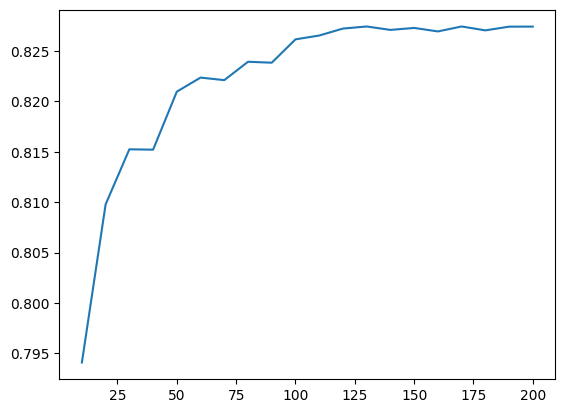

In [90]:
plt.plot(df_scores.n_estimators, df_scores.auc)